In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [3]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions

M87
M87v2
M49
NGC3377
NGC4993
M31
M51
CPU times: user 2min 44s, sys: 3.89 s, total: 2min 48s
Wall time: 3min 1s


In [4]:
%%time
from drivers import filters, iso_models, drivers, sky

Loading Isochrone Models
CPU times: user 42.9 s, sys: 9.09 s, total: 52 s
Wall time: 52.8 s


GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.

In [5]:
def many_pcmd_compares(keys, axes=None):
    n = len(keys)
    if axes is None:
        fig, axes = plt.subplots(ncols=n, figsize=(5*(n+1), 6))
    for i, k in enumerate(keys):
        g = k.split('_')[0]
        a = axes[i]
        ppy.plotting.plot_pcmd_contours(data[k], color='k', alpha=0.5, label='Data', ax=a)
        if k not in pcmds:
            print(f'Modeling best fit for {k}')
            pcmds[k], _ = drivers[g].simulate(results[k].best_model, 128, sky_noise=sky[g], dither=False, mag_system=('ab' if g=='M31' else 'vega'))
        ppy.plotting.plot_pcmd_contours(pcmds[k], color='b', alpha=1.0, label='Model', ax=a)
        ppy.plotting.plot_isochrone(iso_models[g], axes=a, alpha=0.)
    fig.tight_layout()
    return fig, axes

In [6]:
plt.style.use('cook')

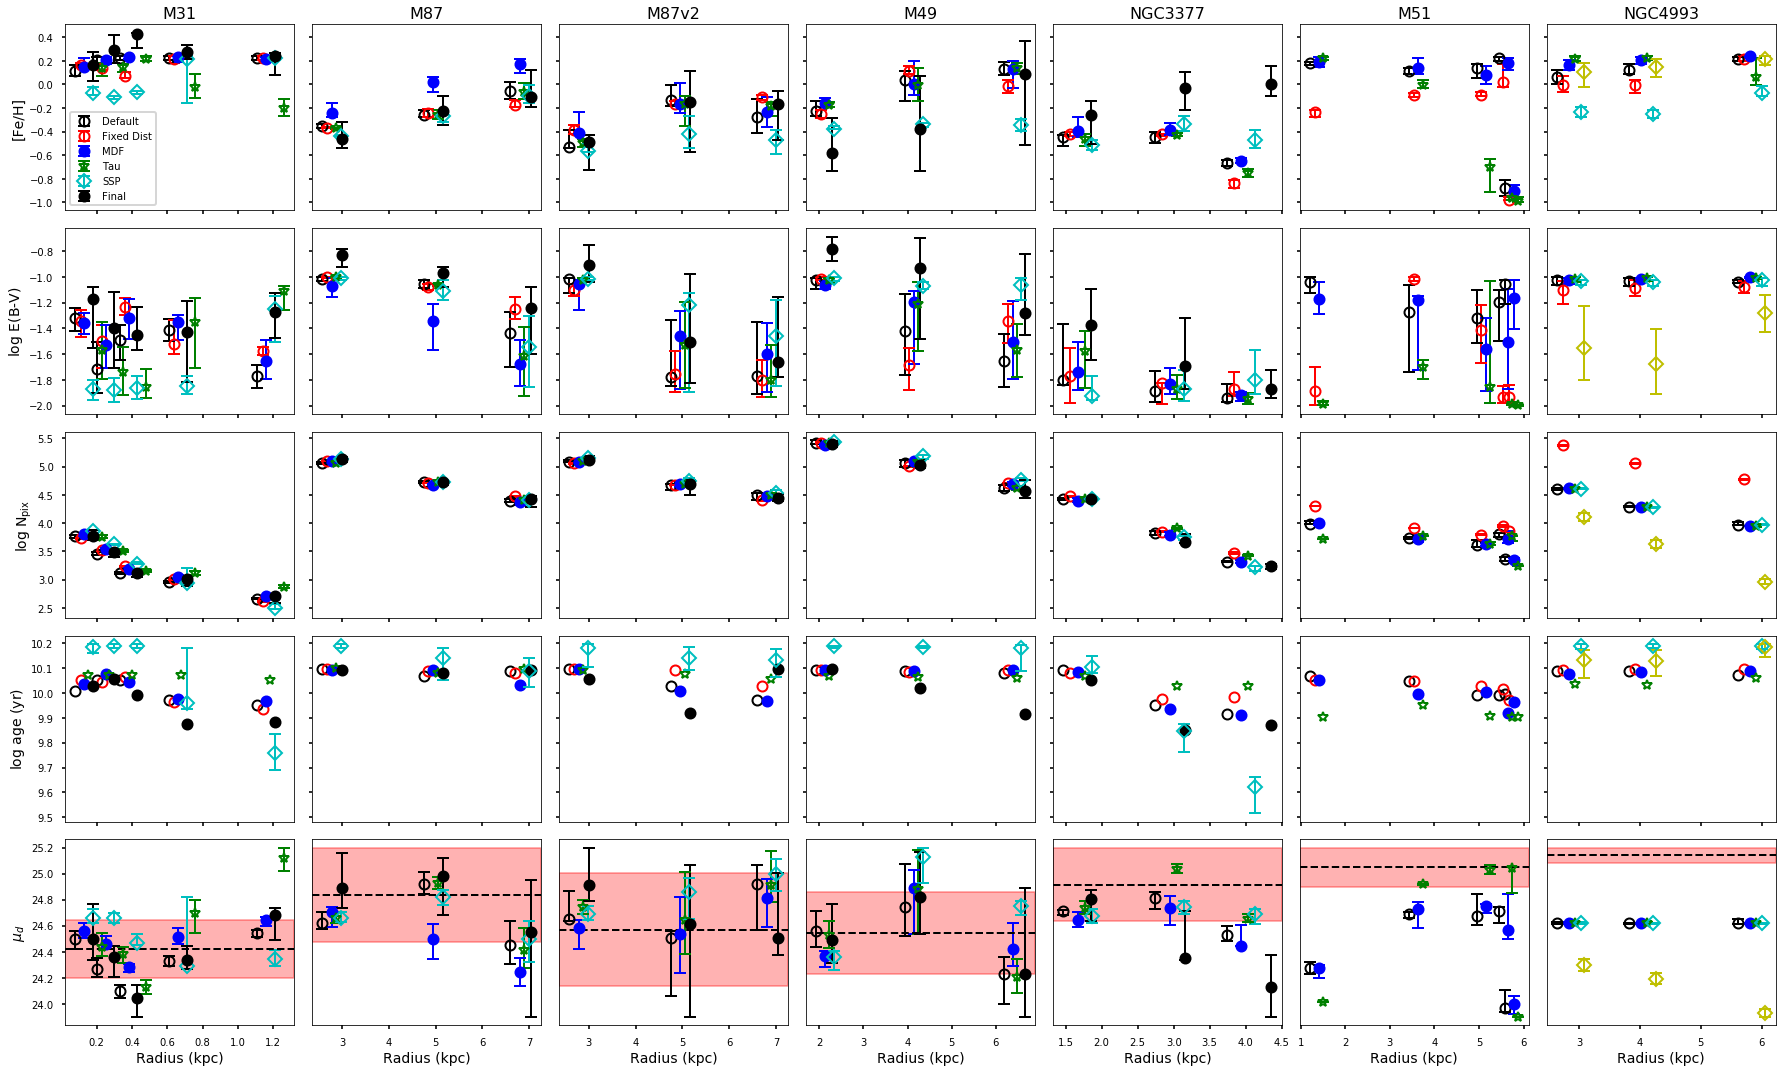

In [11]:
fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(25, 15), sharex='col', sharey='row')
for a in axes[-1]:
    a._shared_y_axes.remove(a)
for i, g in enumerate(['M31', 'M87', 'M87v2', 'M49', 'NGC3377', 'M51', 'NGC4993']):
    a = axes[:,i]
    if g in ['M31', 'M51']:
        rs = ['a', 'b', 'c', 'd', 'e']
    else:
        rs = ['a1', 'b1', 'c1']
    for j, r in enumerate(rs):
        k = f'{g}_{r}_m1'
        c,m,mfc = 'k','o','None'
        dx = (-0.05 if g=='M31' else -0.2)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m2'
        c,m,mfc = 'r','o','None'
        dx = (-0.02 if g=='M31' else -0.1)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m3'
        c,m,mfc = 'b','o','b'
        dx = 0.
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
        a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m4'
        c,m,mfc = 'g','*','None'
        dx = (0.02 if g=='M31' else 0.1)
        results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=radii_kpc[k]+0.1,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        if g != 'M51':
            k = f'{g}_{r}_m5'
            c,m,mfc = 'c','D','None'
            dx = (0.05 if g=='M31' else 0.2)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

        if g == 'NGC4993':
            k = f'{g}_{r}_m6'
            c,m,mfc = 'y','D','None'
            dx = (0.07 if g=='M31' else 0.25)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)
        elif g != 'M51':
            k = f'{g}_{r}_m6'
            c,m,mfc = 'k','o','k'
            dx = (0.05 if g=='M31' else 0.2)
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Final' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)

    a[-1].axhline(y=dmods[g], ls='--', color='k')
    a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
    a[0].set_title(g)
axes[0,0].legend(loc=0, fontsize=10)
for a in axes[-1]:
    a.set_xlabel('Radius (kpc)')
for i, a in enumerate(axes[:,0]):
    a.set_ylabel(results['M87_a1_m5'].labels[i])
fig.tight_layout()

# M31

In [9]:
for k in [k for k in results.keys() if 'M31' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M31_a_m1 4.611681492860953e-05 --DONE
M31_b_m1 0.004531120674528211 --DONE
M31_c_m1 0.0008204757432395127 --DONE
M31_d_m1 0.0007618114102569962 --DONE
M31_e_m1 0.006889994996754467 --DONE
M31_a_m2 2.2778795027988963e-07 --DONE
M31_b_m2 0.002519956670994361 --DONE
M31_c_m2 0.0006256293950173131 --DONE
M31_d_m2 2.9803032475683722e-05 --DONE
M31_e_m2 0.0008410899253021853 --DONE
M31_a_m3 0.0008141322500705428 --DONE
M31_b_m3 0.026522425539269534 --DONE
M31_c_m3 0.04929980809811241 --DONE
M31_d_m3 0.006715431582506426 --DONE
M31_e_m3 0.14205305700897952
M31_a_m4 1.9920630620617885e-06 --DONE
M31_b_m4 1.1431040547904558e-05 --DONE
M31_c_m4 5.064511515229242e-05 --DONE
M31_d_m4 5.6852513807825744e-09 --DONE
M31_e_m4 1.6034216514526634e-06 --DONE
M31_a_m5 0.0002079886412502674 --DONE
M31_b_m5 1.1987186553596985e-05 --DONE
M31_c_m5 4.817085937247612e-06 --DONE
M31_d_m5 4.731859007733874e-06 --DONE
M31_e_m5 2.7724581741495058e-08 --DONE
M31_a_m6 0.17599244198208908
M31_b_m6 0.16497050864518314


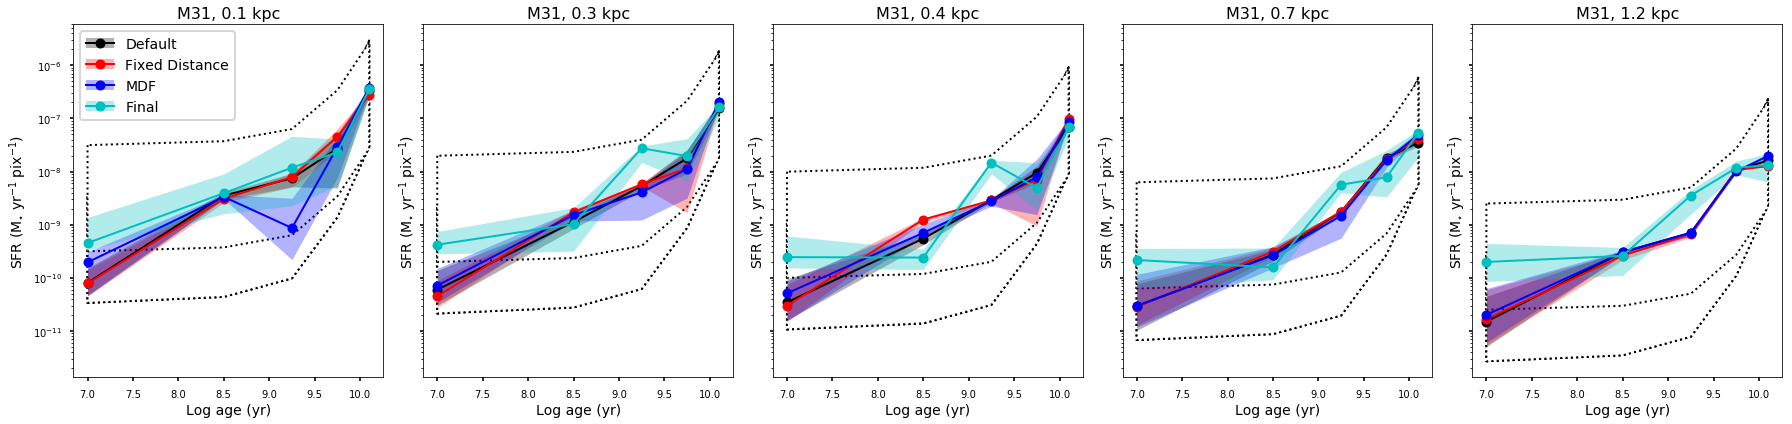

In [10]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 6), sharex=True, sharey=True)
for i, r in enumerate(['e','d','c','b','a']):
    ax = axes[i]
    ax, lines1 = results[f'M31_{r}_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M31_{r}_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M31_{r}_m3'].plot_sfr(ax=ax, color='b')
    ax, lines4 = results[f'M31_{r}_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
    else:
        ax.get_legend().remove()
    k = f'M31_{r}_m1'
    ax.set_title(f'M31, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

In [16]:
fig, axes = many_pcmd_compares(['M31_a_m1', 'M31_b_m1', 'M31_c_m1', 'M31_d_m1', 'M31_e_m1'])

Modeling best fit for M31_e_m1


In [17]:
fig, axes = many_pcmd_compares(['M31_a_m3', 'M31_b_m3', 'M31_c_m3', 'M31_d_m3', 'M31_e_m3'])

Modeling best fit for M31_e_m3


Modeling best fit for M31_c_m4
Modeling best fit for M31_d_m4
Modeling best fit for M31_e_m4


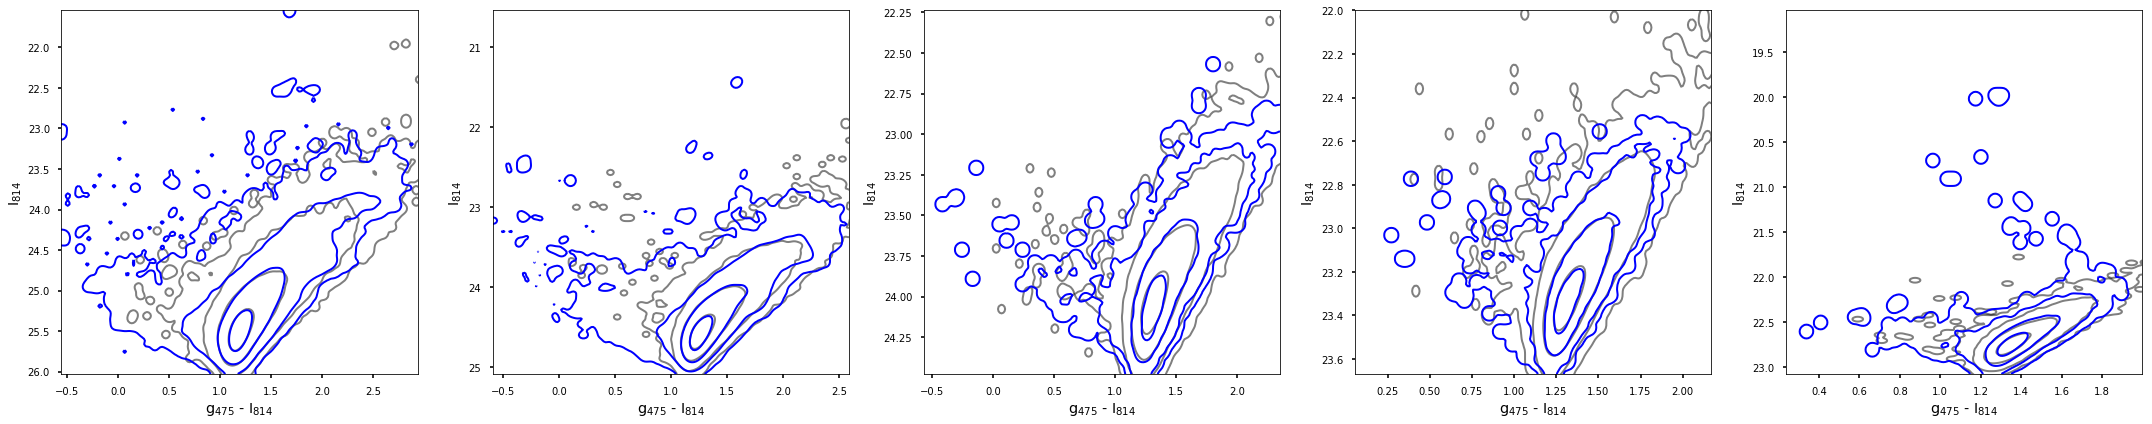

In [18]:
fig, axes = many_pcmd_compares(['M31_a_m4', 'M31_b_m4', 'M31_c_m4', 'M31_d_m4', 'M31_e_m4'])

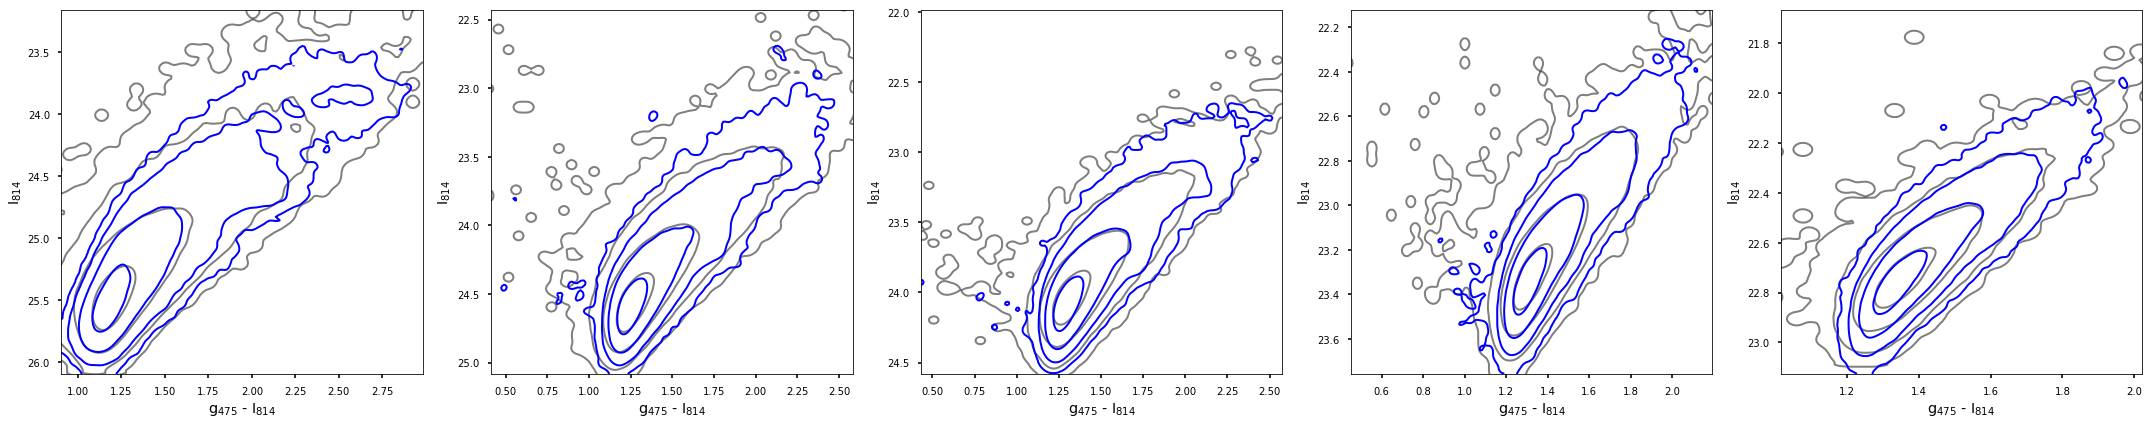

In [19]:
fig, axes = many_pcmd_compares(['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_d_m5', 'M31_e_m5'])

In [20]:
results['M31_a_m1'].as_dynesty()['logz'][-1]

-1410.244690131056

In [21]:
results['M31_a_m2'].as_dynesty()['logz'][-1]

-1472.7171495497557

In [22]:
results['M31_a_m3'].as_dynesty()['logz'][-1]

-1138.5540193580132

In [23]:
results['M31_a_m4'].as_dynesty()['logz'][-1]

-1868.8646612525072

In [24]:
results['M31_a_m5'].as_dynesty()['logz'][-1]

-3429.826076907573

# M87

In [12]:
for k in [k for k in results.keys() if 'M87' in k and 'M87v2' not in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87_a1_m1 0.5162805347335961 --DONE
M87_b1_m1 0.07984997233830171 --DONE
M87_c1_m1 0.036580557660812474 --DONE
M87_a1_m2 0.00011793160298623206 --DONE
M87_b1_m2 0.0015483471860378017 --DONE
M87_c1_m2 0.0005326117419883758 --DONE
M87_a1_m3 0.3110162378699215 --DONE
M87_b1_m3 0.061829558162472154 --DONE
M87_c1_m3 0.05863948597755808 --DONE
M87_a1_m4 2.2104959640500965e-06 --DONE
M87_b1_m4 0.0019292875707819235 --DONE
M87_c1_m4 4.49216447151457e-05 --DONE
M87_a1_m5 1.4009350621790873e-06 --DONE
M87_b1_m5 0.0033791305336663413 --DONE
M87_c1_m5 0.0019324645720715239 --DONE
M87_a1_m6 0.16265323120617836
M87_b1_m6 0.15134811482496957
M87_c1_m6 0.13504353404917424


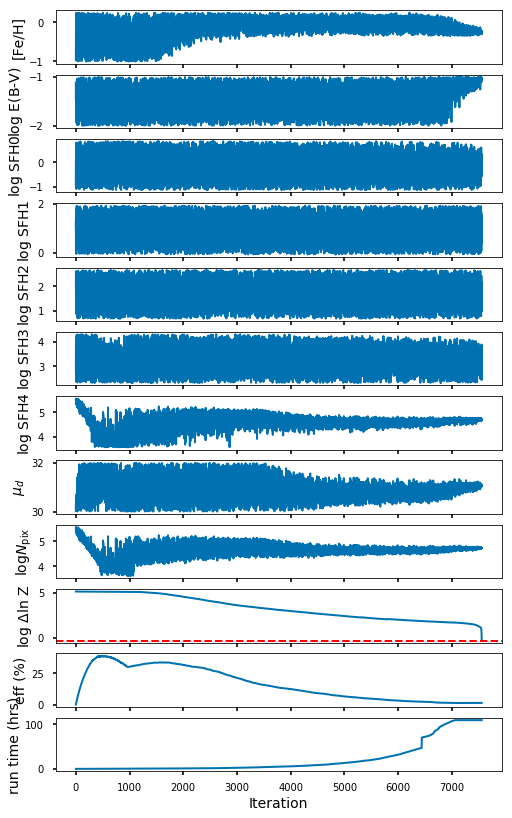

In [13]:
results['M87_b1_m1'].plot_chains();

In [32]:
for k in [k for k in results.keys() if 'M87v2' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87v2_a1_m1 0.13421064324704446
M87v2_b1_m1 0.07665307532353438
M87v2_c1_m1 0.07229697448617856
M87v2_a1_m2 0.07890994489518732
M87v2_b1_m2 0.05156074790335197
M87v2_c1_m2 0.02545850257355653
M87v2_a1_m3 0.09971772298973747
M87v2_b1_m3 0.08183381761871544
M87v2_c1_m3 0.04120427617505129 --DONE
M87v2_a1_m4 0.0075147716506620554
M87v2_b1_m4 0.025175370381418816
M87v2_c1_m4 0.01498900988757157
M87v2_a1_m5 0.04264805879574851 --DONE
M87v2_b1_m5 0.018723833132753498 --DONE
M87v2_c1_m5 0.017162786804334473 --DONE


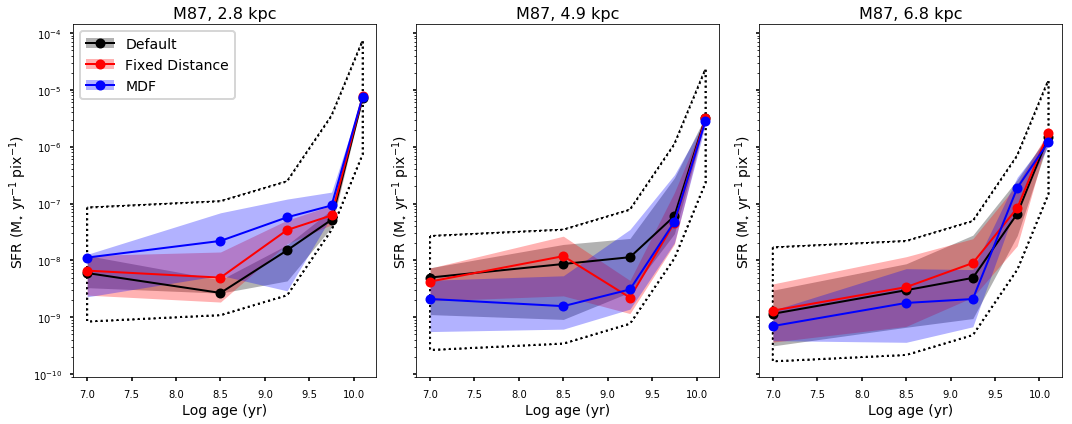

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M87_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M87_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M87_{r}1_m1'
    ax.set_title(f'M87, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

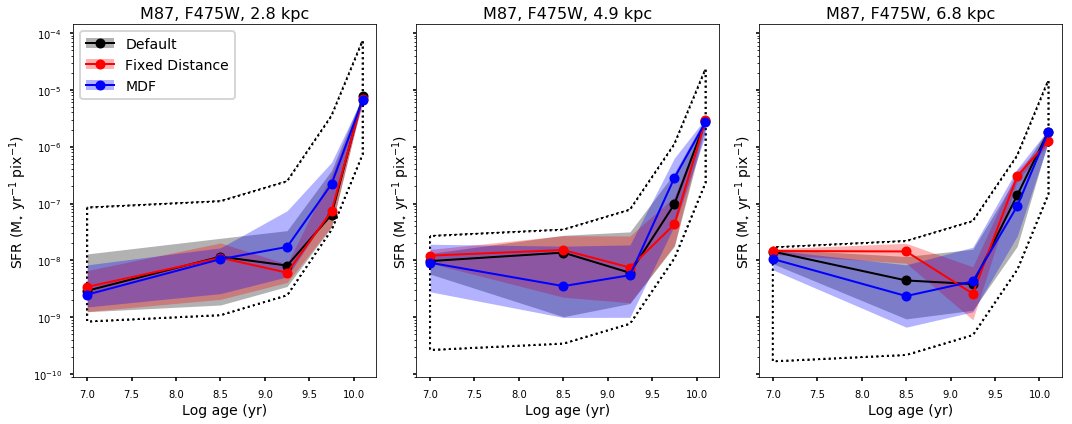

In [34]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87v2_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M87v2_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M87v2_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M87v2_{r}1_m1'
    ax.set_title(f'M87, F475W, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

# M49

In [35]:
for k in [k for k in results.keys() if 'M49' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M49_a1_m1 0.03470241072125191 --DONE
M49_b1_m1 0.0847416785568953
M49_c1_m1 0.012043221352939781 --DONE
M49_a1_m2 0.004323011116099451 --DONE
M49_b1_m2 0.06194020727448901
M49_c1_m2 0.0013971699485182398 --DONE
M49_a1_m3 0.23094606974706267 --DONE
M49_b1_m3 0.11656898479452593 --DONE
M49_c1_m3 0.027349113888163856 --DONE
M49_a1_m4 0.0005298712531498495 --DONE
M49_b1_m4 7.657622205670123e-06 --DONE
M49_c1_m4 6.337456281357845e-05 --DONE
M49_a1_m5 0.4568474315676667 --DONE
M49_b1_m5 0.2444705887641021 --DONE
M49_c1_m5 0.12855980068383133 --DONE


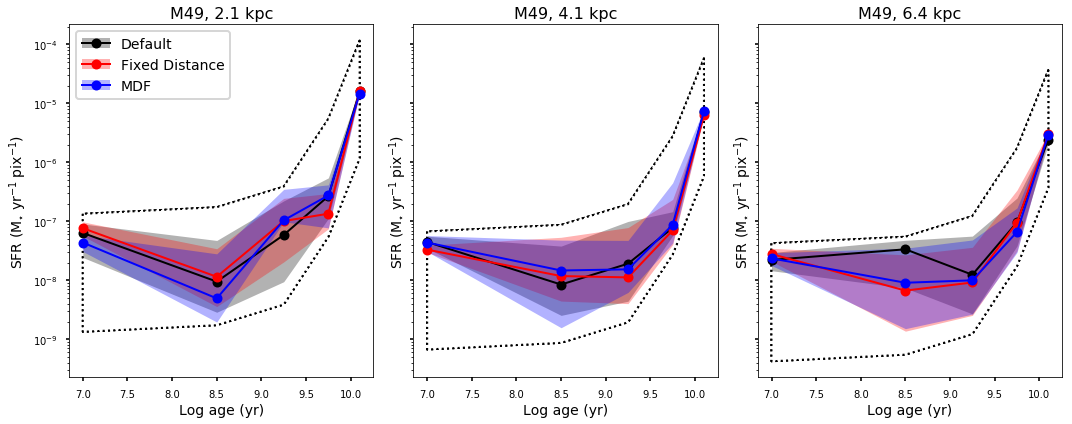

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M49_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M49_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M49_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M49_{r}1_m1'
    ax.set_title(f'M49, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

# NGC 3377

In [39]:
for k in [k for k in results.keys() if 'NGC3377' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC3377_a1_m1 0.32119924577563097 --DONE
NGC3377_b1_m1 0.16921234050278144
NGC3377_c1_m1 0.14565327869877365 --DONE
NGC3377_a1_m2 0.15422306542711794 --DONE
NGC3377_b1_m2 0.11485655004895534
NGC3377_c1_m2 0.12560436114836193
NGC3377_a1_m3 0.05639259210539649
NGC3377_b1_m3 0.17053826678306905
NGC3377_c1_m3 0.4082973365404996 --DONE
NGC3377_a1_m4 3.7224875299557425e-05 --DONE
NGC3377_b1_m4 2.012684990404523e-05 --DONE
NGC3377_c1_m4 6.338819844131649e-05 --DONE
NGC3377_a1_m5 0.0013302724022707935 --DONE
NGC3377_b1_m5 0.0015325779260138006 --DONE
NGC3377_c1_m5 0.0020730669559725357 --DONE


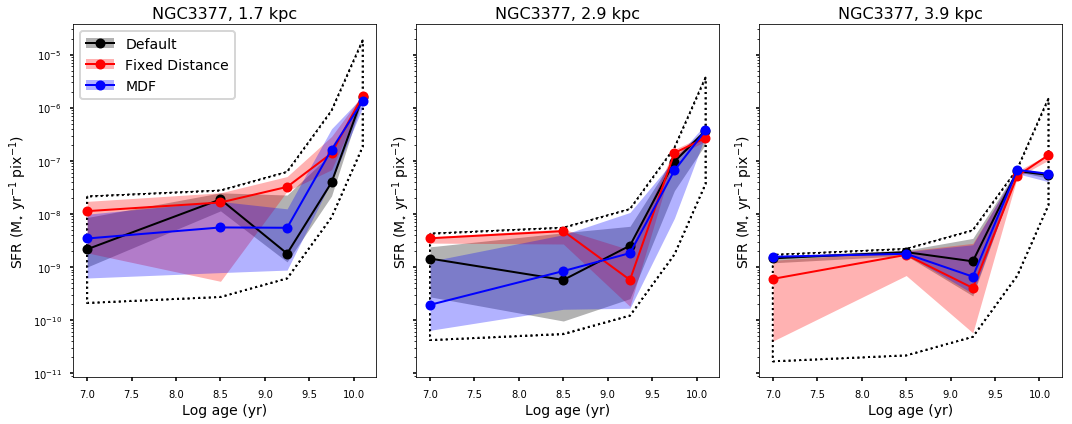

In [40]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'NGC3377_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'NGC3377_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'NGC3377_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'NGC3377_{r}1_m1'
    ax.set_title(f'NGC3377, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

# NGC4993

In [13]:
for k in [k for k in results.keys() if 'NGC4993' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC4993_a1_m1 0.00019240811478482556 --DONE
NGC4993_b1_m1 0.0012629243443313953
NGC4993_c1_m1 0.09243522348731403
NGC4993_a1_m2 0.0003423284204018273 --DONE
NGC4993_b1_m2 0.0038244217460032814
NGC4993_c1_m2 0.003426293742904818
NGC4993_a1_m3 0.00027020629609353364 --DONE
NGC4993_b1_m3 0.002770593528310883
NGC4993_c1_m3 0.013519651759281714
NGC4993_a1_m4 0.00011029770963943974 --DONE
NGC4993_b1_m4 3.209880190979675e-06 --DONE
NGC4993_c1_m4 0.005115947172384949
NGC4993_a1_m5 0.00010286195204400883 --DONE
NGC4993_b1_m5 5.29978046870383e-06 --DONE
NGC4993_c1_m5 0.00012207218060211744 --DONE
NGC4993_a1_m6 0.0018937785632999748
NGC4993_b1_m6 0.007807999971447543
NGC4993_c1_m6 0.016927716599298037


Modeling best fit for NGC4993_b1_m1
Modeling best fit for NGC4993_c1_m1


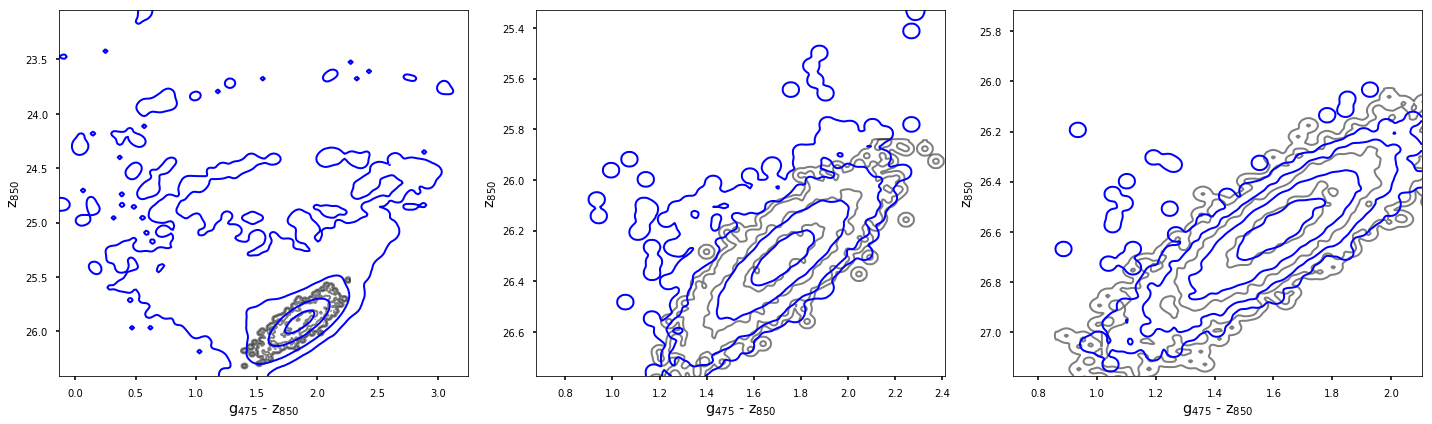

In [9]:
fig, axes = many_pcmd_compares(['NGC4993_a1_m1', 'NGC4993_b1_m1', 'NGC4993_c1_m1'])

In [19]:
results['NGC4993_a1_m6'].best_model.dmod, results['NGC4993_b1_m6'].best_model.dmod, results['NGC4993_c1_m6'].best_model.dmod,


(29.945, 29.12, 28.316999999999997)

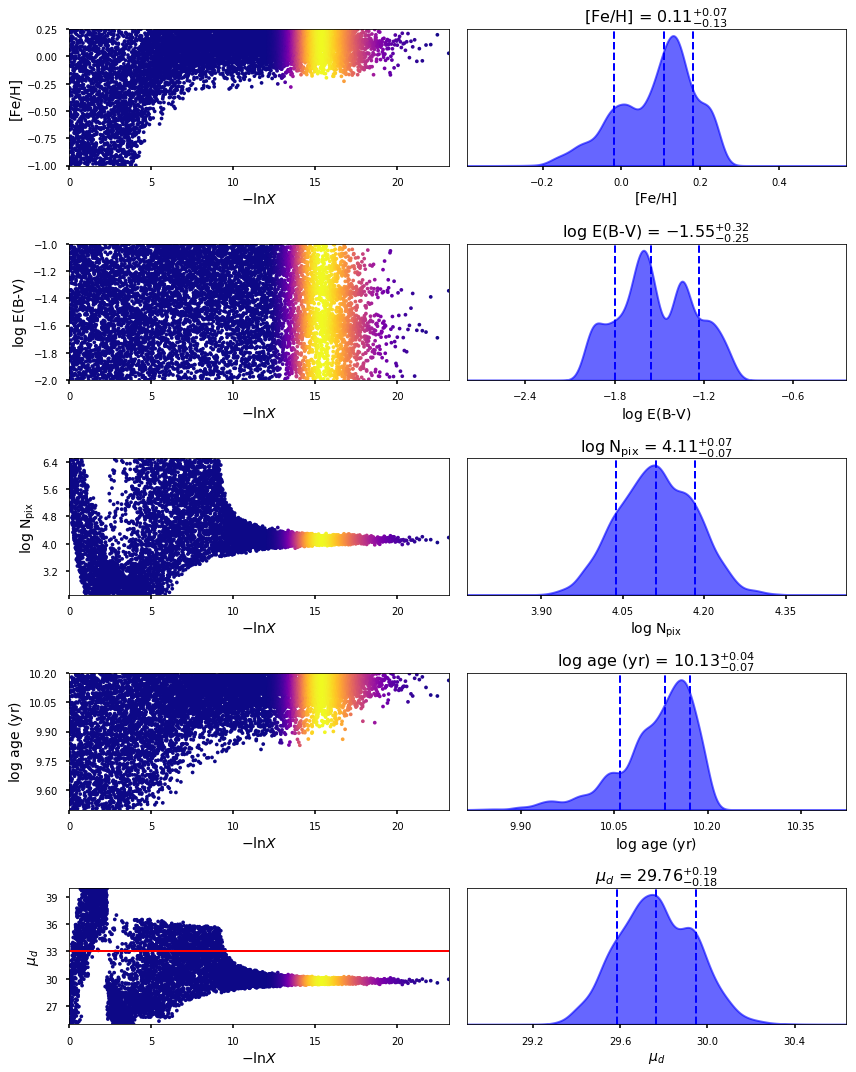

In [15]:
results['NGC4993_a1_m6'].plot_trace();

In [16]:
results['NGC4993_b1_m6'].plot_trace();

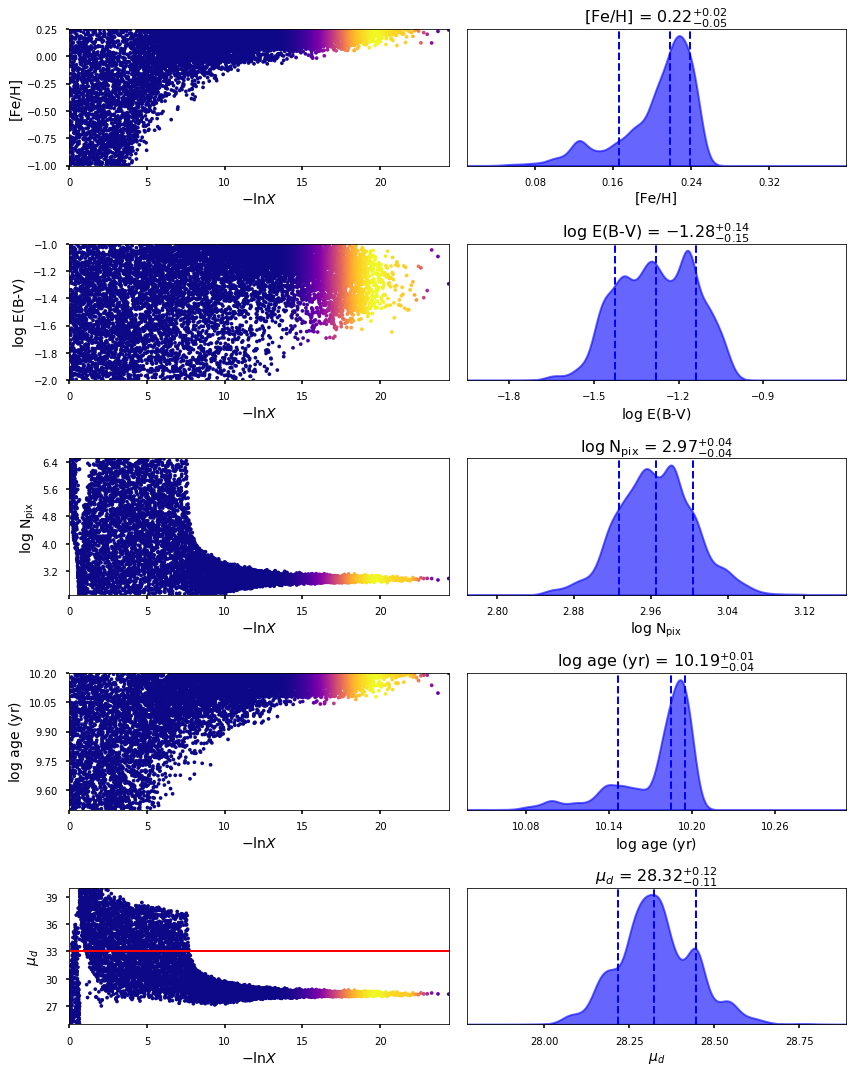

In [17]:
results['NGC4993_c1_m6'].plot_trace();

In [30]:
for k in ['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6']:
    pcmds.pop(k)

In [28]:
# for f in drivers['NGC4993'].filters:
#     f._exposure *= 0.5

In [33]:
# sky['NGC4993'] = [s*0.5 for s in sky['NGC4993']]

In [34]:
fig, axes = many_pcmd_compares(['NGC4993_a1_m6', 'NGC4993_b1_m6', 'NGC4993_c1_m6'])
for a in axes:
    a.axhline(y=filters['NGC4993'][0].counts_to_mag(sky['NGC4993'][0]), color='r', ls='--')
    a.set_ylim(ymin=27.4)

Modeling best fit for NGC4993_a1_m6
Modeling best fit for NGC4993_b1_m6
Modeling best fit for NGC4993_c1_m6
